# Sales Data Analysis- Aradhya Goswami

## Importing Libraries

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [3]:
# Load the dataset
sales_df = pd.read_csv("sales.csv")

# Display basic information
print(sales_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [4]:
print(sales_df.head())

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total  \
0       Health and beauty       74.69         7  26.1415  548.9715   
1  Electronic accessories       15.28         5   3.8200   80.2200   
2      Home and lifestyle       46.33         7  16.2155  340.5255   
3       Health and beauty       58.22         8  23.2880  489.0480   
4       Sports and travel       86.31         7  30.2085  634.3785   

         Date   Time      Payment    cogs  gross margin percentage  \
0  01-05-2019  13:08      Ewallet  522.83                 4.761905   
1  03-08-2019  10:29         Cash   76.40                 4.761905   
2  03-03-2019  13:23

## Checking for Missing Values

In [6]:
print(sales_df.isnull().sum())

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


## Check Data Types

In [8]:
print(sales_df.dtypes)

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


## Summary Statistics

In [9]:
# Summary statistics of numerical columns
print(sales_df.describe())

        Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count             1.000000e+03   1000.000000  1000.00000  
mean              4.761905e+00     15.379369     6.97270  
std               6.131498e-14     11.708825     1.71858  
min               4.761905e+00      0.508500     4.00000  
25%               4.761905e+00      5.924875   

## Correlation Heatmap

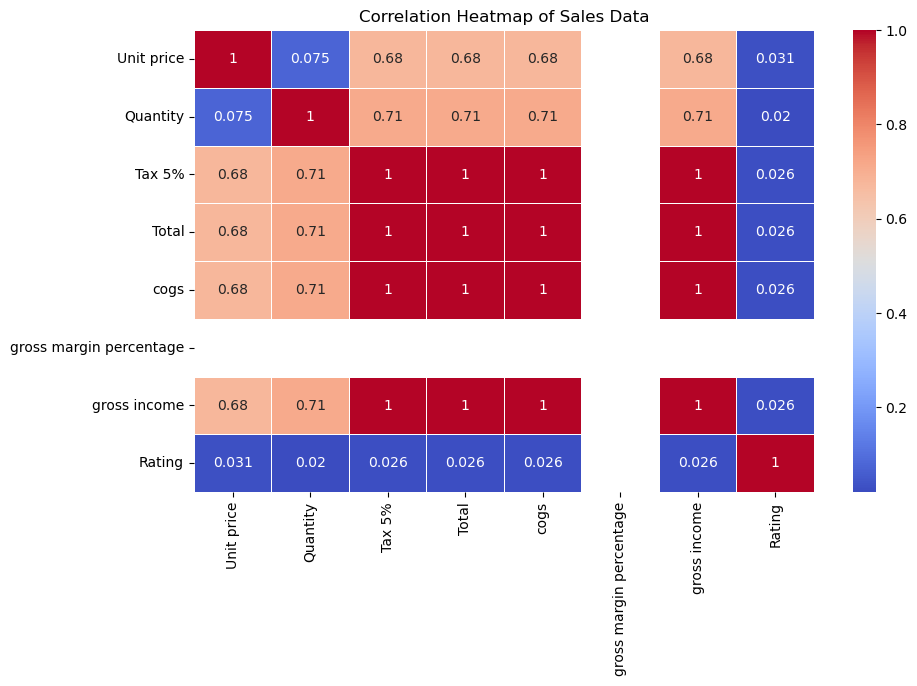

In [32]:
# Compute correlation matrix for numerical features
correlation_matrix = sales_df.select_dtypes(include=['float64', 'int64']).corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Sales Data")
plt.show()

## Pairplot for Important Numerical Features

/Users/aradhya814/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


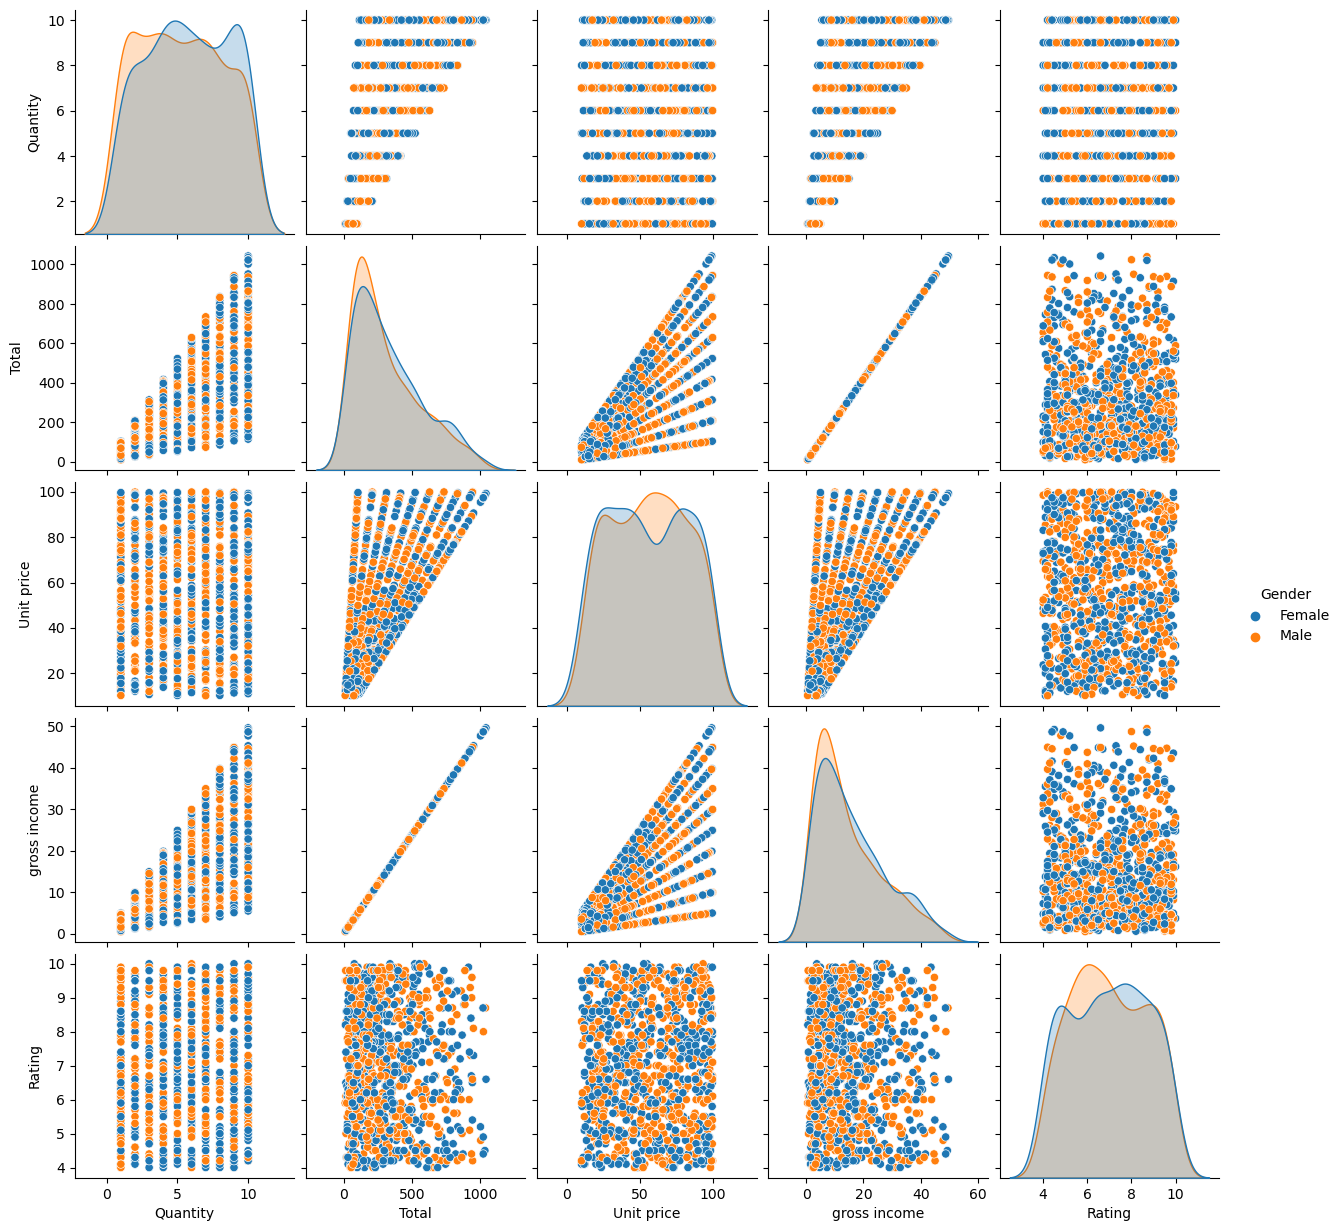

In [13]:
# Pairplot to analyze relationships
sns.pairplot(sales_df, vars=['Quantity', 'Total', 'Unit price', 'gross income', 'Rating'], hue="Gender")
plt.show()

## Customer Type vs Payment Heatmap

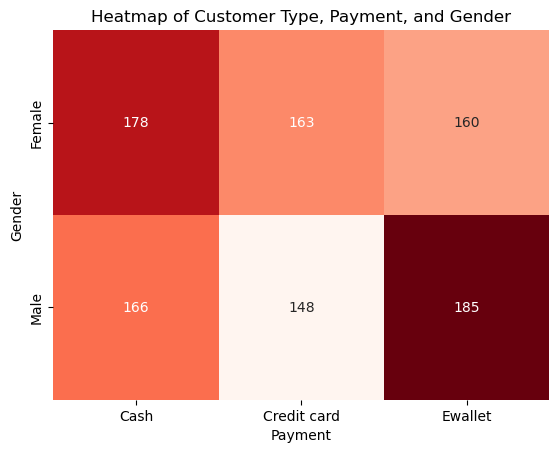

In [18]:
pivot_table = sales_df.pivot_table(index='Gender', columns='Payment', values='Customer type', aggfunc='count', fill_value=0)

sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.title("Heatmap of Customer Type, Payment, and Gender")
plt.show()

## Sales Distribution by Product Line

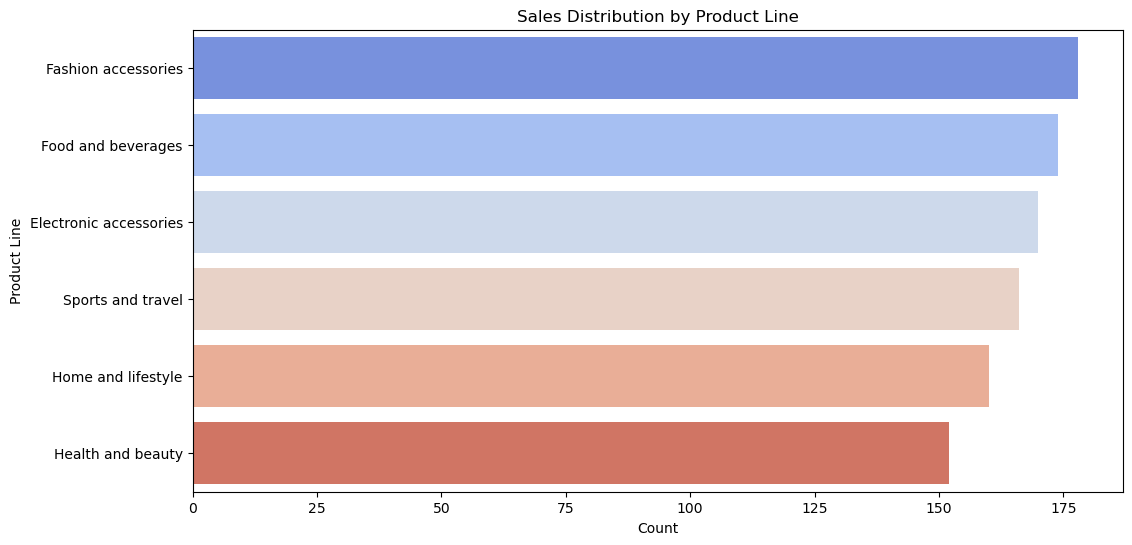

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(y="Product line", data=sales_df, order=sales_df["Product line"].value_counts().index, palette="coolwarm")
plt.title("Sales Distribution by Product Line")
plt.xlabel("Count")
plt.ylabel("Product Line")
plt.show()


## Total Sales by Branch

/var/folders/v9/wqt89x5x19x474d778y927kc0000gn/T/ipykernel_38774/3707201469.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Branch", y="Total", data=sales_df, estimator=sum, ci=None, palette="pastel")


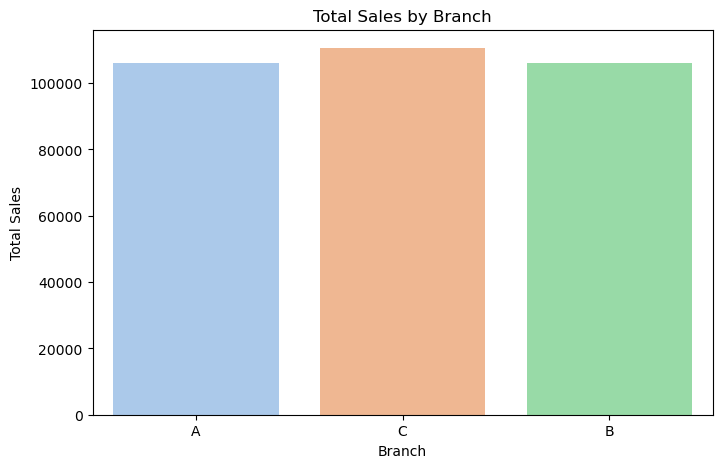

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Branch", y="Total", data=sales_df, estimator=sum, ci=None, palette="pastel")
plt.title("Total Sales by Branch")
plt.xlabel("Branch")
plt.ylabel("Total Sales")
plt.show()

## Distribution of Ratings

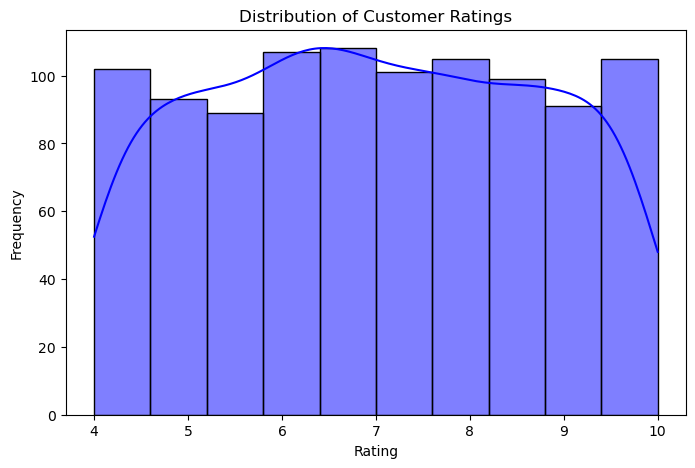

In [21]:
plt.figure(figsize=(8, 5))
sns.histplot(sales_df["Rating"], bins=10, kde=True, color="blue")
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


## Sales Trends Over Time

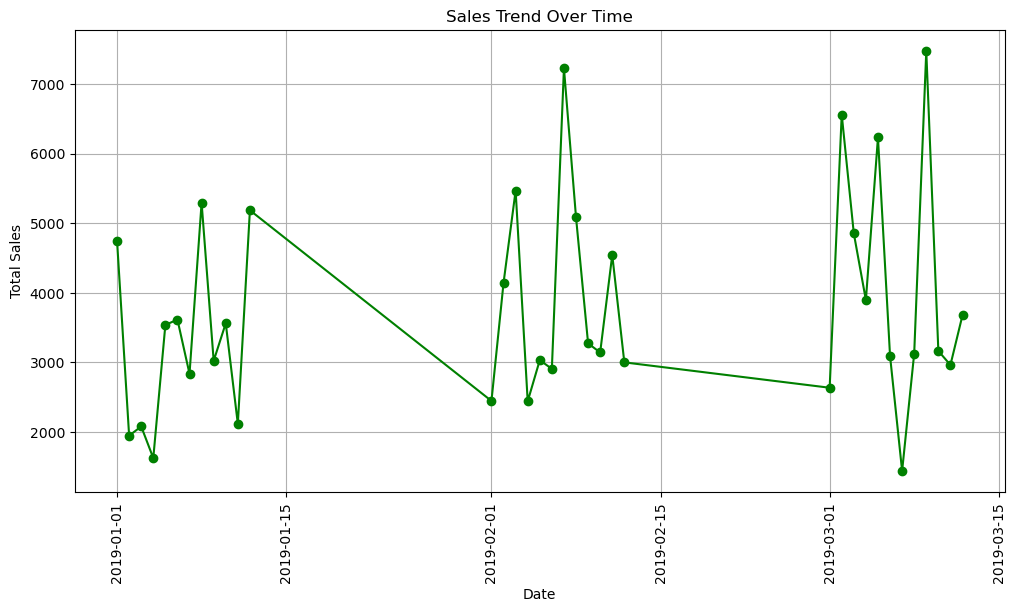

In [33]:
# Convert 'Date' column to datetime format, handling errors
sales_df["Date"] = pd.to_datetime(sales_df["Date"], errors="coerce")

# Drop rows where 'Date' conversion failed
sales_df = sales_df.dropna(subset=["Date"])

# Ensure 'Total' column is numeric
sales_df["Total"] = pd.to_numeric(sales_df["Total"], errors="coerce")

# Group by Date and sum the total sales
daily_sales = sales_df.groupby("Date")["Total"].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, marker="o", linestyle="-", color="green")
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

## Payment Method Distribution

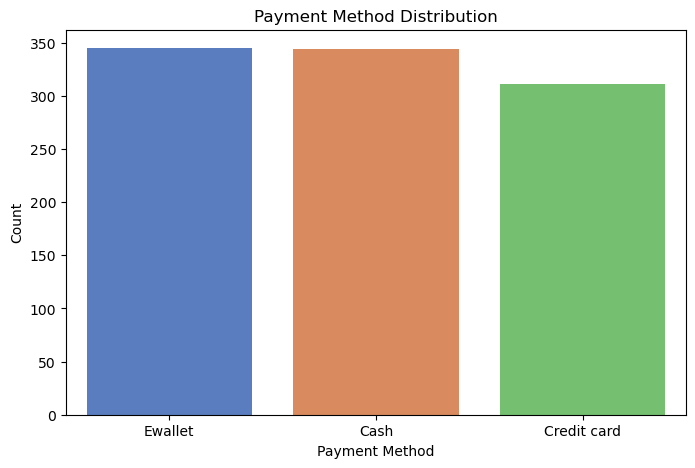

In [24]:
plt.figure(figsize=(8, 5))
sns.countplot(x="Payment", data=sales_df, palette="muted")
plt.title("Payment Method Distribution")
plt.xlabel("Payment Method")
plt.ylabel("Count")
plt.show()

## Boxplot of Unit Price by Product Line

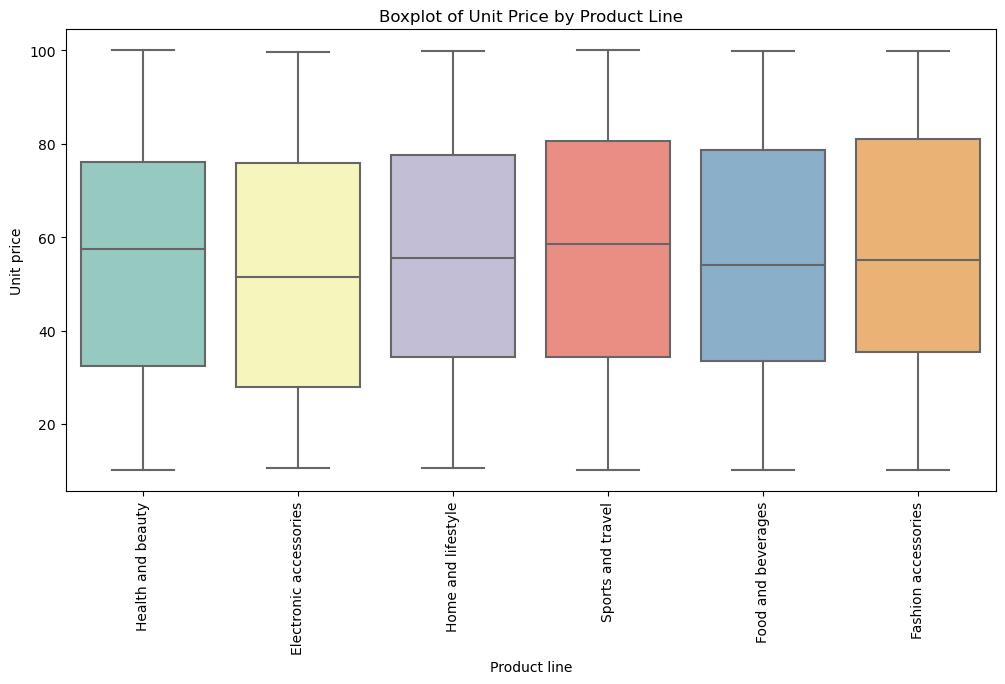

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(x="Product line", y="Unit price", data=sales_df, palette="Set3")
plt.title("Boxplot of Unit Price by Product Line")
plt.xticks(rotation=90)
plt.show()